Performing well

In [1]:
import pandas as pd

# Load the dataset (adjust filename as needed)
df = pd.read_excel('6S_AI_TASK-Loan_default_Loan_default.xlsx')

# Display shape and preview
print("Shape:", df.shape)
display(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check data types
print("Data types:\n", df.dtypes)

# Summary statistics (numeric cols)
print(df.describe())


Shape: (255246, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


Missing values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
Data types:
 LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object
                 Age         Income     LoanAmount    CreditScore  \
count  255246.000000  255246.000000  255246.00

In [2]:
# Check the class balance for 'Default'
print("Default value counts:\n", df['Default'].value_counts())

Default value counts:
 0    225602
1     29644
Name: Default, dtype: int64


In [3]:
# List unique values for each categorical column
categoricals = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
for col in categoricals:
    print(f"{col} unique values:", df[col].unique())


Education unique values: ["Bachelor's" "Master's" 'High School' 'PhD']
EmploymentType unique values: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
MaritalStatus unique values: ['Divorced' 'Married' 'Single']
HasMortgage unique values: ['Yes' 'No']
HasDependents unique values: ['Yes' 'No']
LoanPurpose unique values: ['Other' 'Auto' 'Business' 'Home' 'Education']
HasCoSigner unique values: ['Yes' 'No']


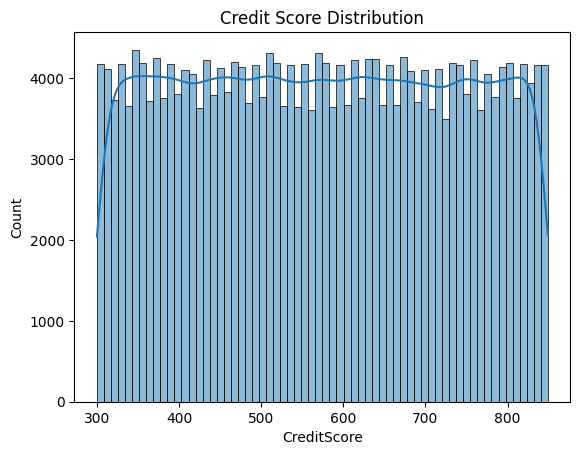

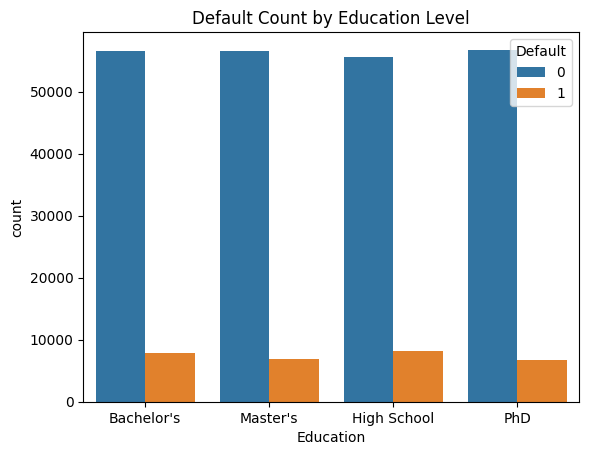

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of a numeric column, e.g., CreditScore
sns.histplot(df['CreditScore'], kde=True)
plt.title('Credit Score Distribution')
plt.show()

# Default by Education
sns.countplot(data=df, x='Education', hue='Default')
plt.title('Default Count by Education Level')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Encode categorical variables using get_dummies (One-Hot)
df_encoded = pd.get_dummies(df, columns=categoricals, drop_first=True)
df_encoded.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,0,0,0,1,1,0,0,0,1,1
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0,1,0,0,0,0,0,0,1,1
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,1,0,0,1,1,0,0,0,0,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0,1,0,0,0,1,0,0,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,1,0,0,0,1,0,0,0,0,0


In [6]:
if 'LoanID' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['LoanID'])


In [7]:
X = df_encoded.drop('Default', axis=1)
y = df_encoded['Default']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
# rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
# rf.fit(X_res, y_res)


# 7. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    param_grid,
    scoring='roc_auc', cv=3, n_jobs=-1
)
grid_search.fit(X_res, y_res)
best_rf = grid_search.best_estimator_


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# # Predict on X_test (hold-out test set, not oversampled)
# y_pred_rf = rf.predict(X_test)
# y_proba_rf = rf.predict_proba(X_test)[:, 1]

# # Confusion Matrix
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# # Classification Report
# print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# # ROC AUC Score
# roc_auc = roc_auc_score(y_test, y_proba_rf)
# print(f"ROC AUC: {roc_auc:.4f}")

# # Accuracy Score
# accuracy = accuracy_score(y_test, y_pred_rf)
# print(f"Accuracy: {accuracy:.4f}")


# 8. Model Evaluation on the Test Set
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
roc_auc = roc_auc_score(y_test, y_proba_rf)
print(f"ROC AUC: {roc_auc:.4f}")
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")


Confusion Matrix:
 [[43265  1856]
 [ 5276   653]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92     45121
           1       0.26      0.11      0.15      5929

    accuracy                           0.86     51050
   macro avg       0.58      0.53      0.54     51050
weighted avg       0.82      0.86      0.83     51050

ROC AUC: 0.7071
Accuracy: 0.8603


In [12]:
import joblib
# joblib.dump(rf, "loan_default_model_rf.joblib")

# 10. Save the Model
joblib.dump(best_rf, "loan_default_model_rfs1.joblib")


['loan_default_model_rfs1.joblib']

In [13]:
import pandas as pd

# Example borrower data (set values for a real/simulated applicant)
sample = {
    'Age': 52,
    'Income': 45000,
    'LoanAmount': 120000,
    'CreditScore': 590,
    'MonthsEmployed': 20,
    'NumCreditLines': 1,
    'InterestRate': 13.2,
    'LoanTerm': 48,
    'DTIRatio': 0.77,
    'Education': "High School",
    'EmploymentType': "Unemployed",
    'MaritalStatus': "Single",
    'HasMortgage': "No",
    'HasDependents': "No",
    'LoanPurpose': "Auto",
    'HasCoSigner': "Yes"
}

# sample = {
#     'Age': 40,
#     'Income': 140000,
#     'LoanAmount': 15000,
#     'CreditScore': 820,
#     'MonthsEmployed': 120,
#     'NumCreditLines': 4,
#     'InterestRate': 2.0,
#     'LoanTerm': 24,
#     'DTIRatio': 0.10,
#     'Education': "Master's",
#     'EmploymentType': "Full-time",
#     'MaritalStatus': 'Married',
#     'HasMortgage': 'No',
#     'HasDependents': 'Yes',
#     'LoanPurpose': 'Home',
#     'HasCoSigner': 'No'
# }


sample_df = pd.DataFrame([sample])


In [14]:
# Use the same categorical columns as training
categoricals = ['Education', 'EmploymentType', 'MaritalStatus', 
                'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Optionally, combine the sample with a row from your original dataset to ensure all columns exist
full_df = pd.concat([sample_df, df.iloc[:1, :]], ignore_index=True)  # df is your original dataframe

# Encode
full_encoded = pd.get_dummies(full_df, columns=categoricals, drop_first=True)

# Drop 'LoanID' if present
if 'LoanID' in full_encoded.columns:
    full_encoded = full_encoded.drop(columns=['LoanID'])

# Reindex to match model feature columns
model_features = X_train.columns.tolist()  # X_train from your train/test split
full_encoded = full_encoded.reindex(columns=model_features, fill_value=0)

# Extract processed sample row
X_sample = full_encoded.iloc[[0]]


In [15]:
import joblib

# Load your trained model
clf = joblib.load("loan_default_model_rfs1.joblib")

# Predict risk score and class
risk_score = clf.predict_proba(X_sample)[:, 1][0]  # Probability of default
predicted_default = clf.predict(X_sample)       # 0 = No default, 1 = Default

print(f"Risk score (probability of default): {risk_score:.2f}")
print(f"Predicted default? {'Yes' if predicted_default == 1 else 'No'}")


Risk score (probability of default): 0.56
Predicted default? Yes


In [16]:
import joblib
joblib.dump(X_train.columns.tolist(), 'model_feature_order1.pkl')

['model_feature_order1.pkl']

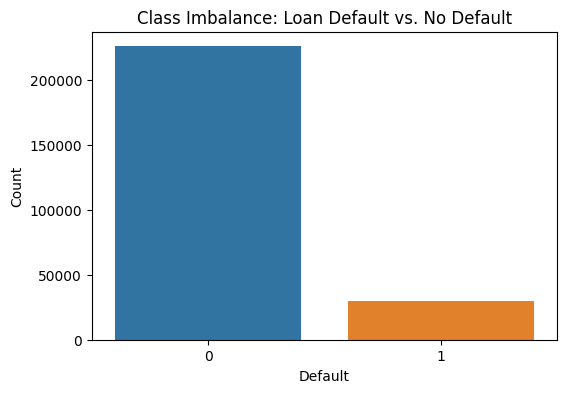

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Default', data=df)
plt.title('Class Imbalance: Loan Default vs. No Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()


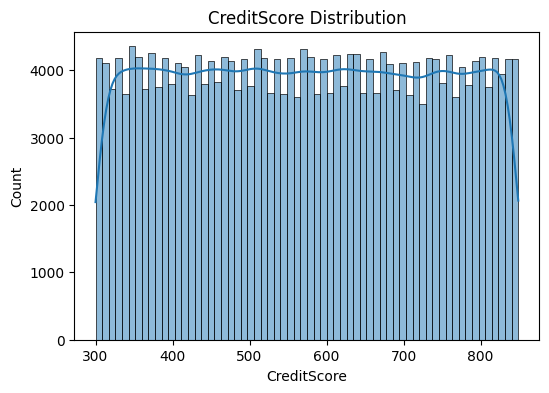

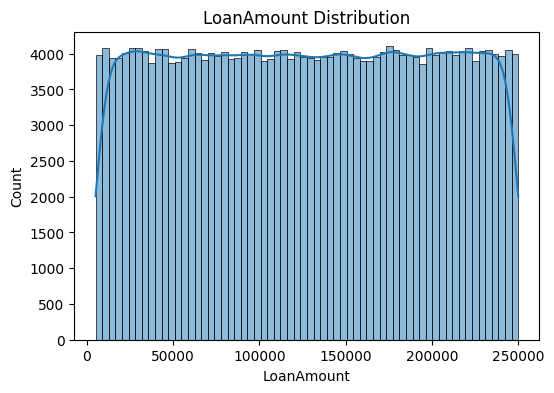

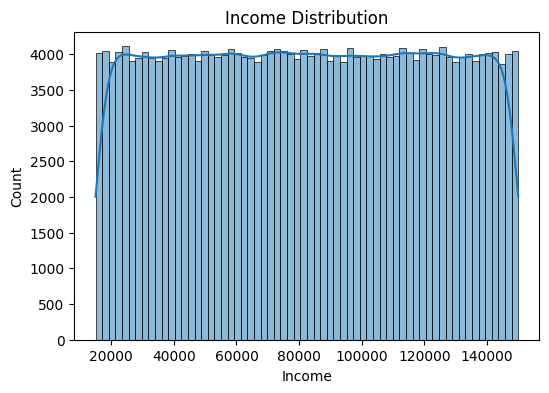

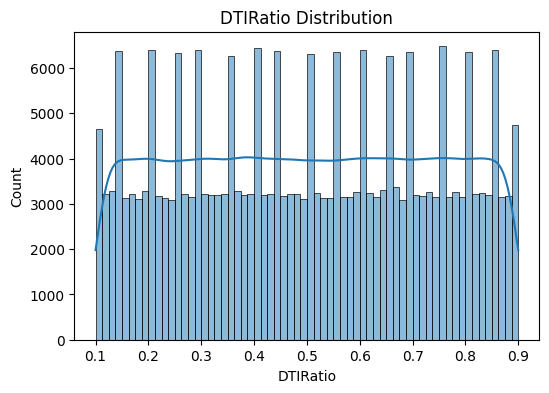

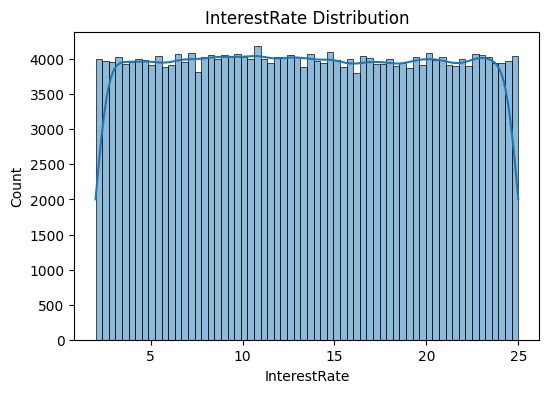

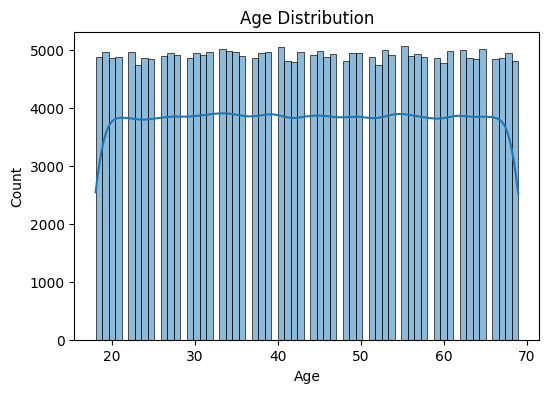

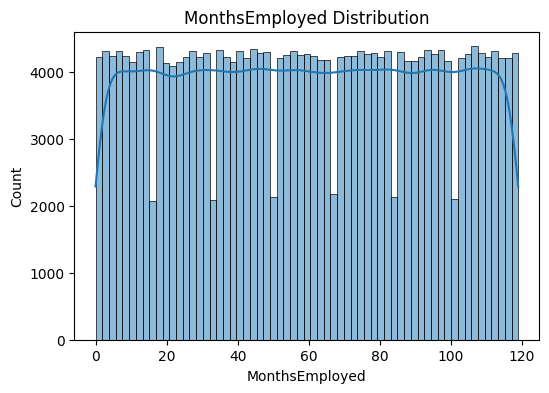

In [18]:
num_features = ['CreditScore', 'LoanAmount', 'Income', 'DTIRatio', 'InterestRate', 'Age', 'MonthsEmployed']

for feature in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()


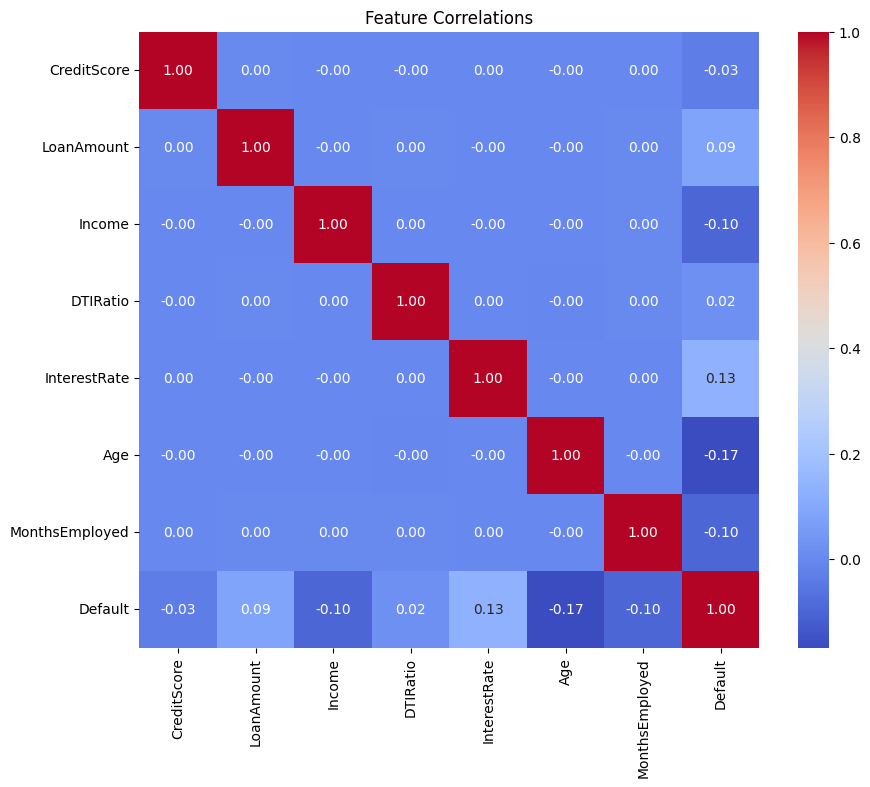

In [19]:
plt.figure(figsize=(10,8))
corr = df[num_features + ['Default']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlations')
plt.show()


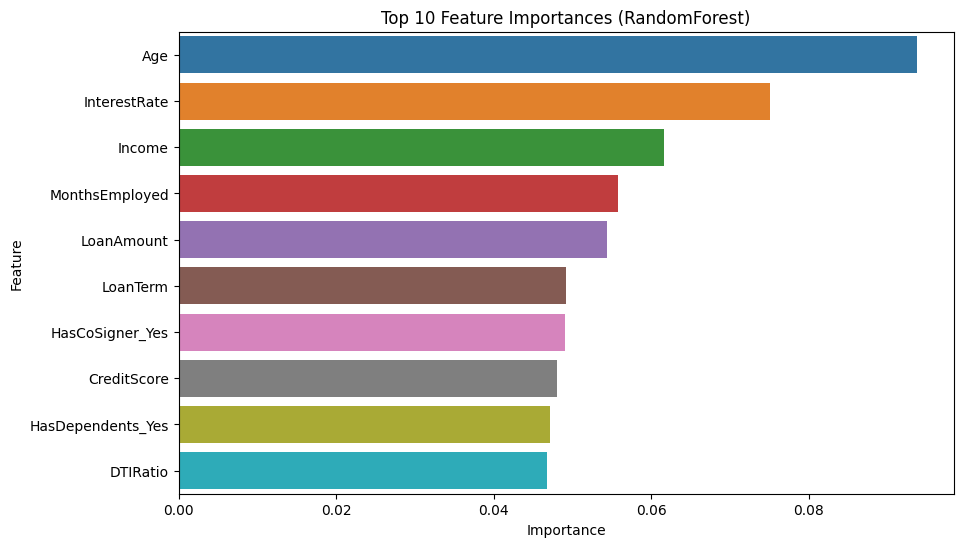

In [20]:
import pandas as pd

feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title('Top 10 Feature Importances (RandomForest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


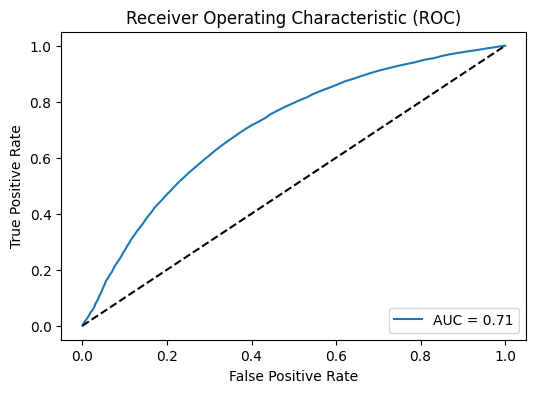

In [21]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


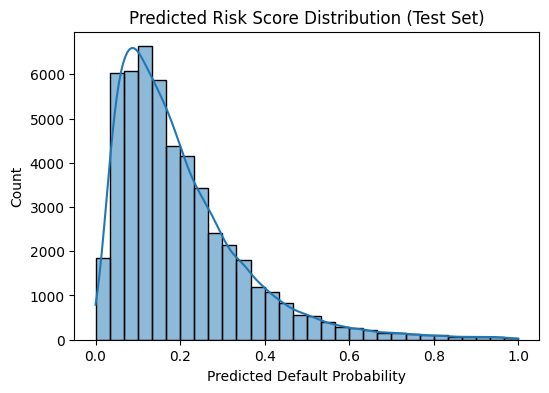

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(y_proba_rf, bins=30, kde=True)
plt.title('Predicted Risk Score Distribution (Test Set)')
plt.xlabel('Predicted Default Probability')
plt.show()
